### Importing Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

#### 3.1

In [90]:
gold = pd.read_csv('GOLD.csv')

In [91]:
x = gold.iloc[:, 1:5].values
y1 = gold.iloc[:, 7].values
y2 = gold.iloc[:, 8].values
x_train = x[:411, :]
x_test = x[411:, :]
y1_train = y1[:411]
y1_test = y1[411:]
y2_train = y2[:411]
y2_test = y2[411:]
polyreg = PolynomialFeatures(degree=2)
x_train_poly = polyreg.fit_transform(x_train)
regressor = LinearRegression()
regressor1 = LinearRegression()
regressor.fit(x_train_poly, y1_train)
regressor1.fit(x_train, y2_train)
y_pred = regressor.predict(polyreg.transform(x_test))
y_train_pred = regressor.predict(x_train_poly)
y_pred1 = regressor1.predict(x_test)
print(regressor1.score(x_test, y2_test))
print(math.sqrt(mean_squared_error(y1_train, y_train_pred)))
print(regressor.score(x_train_poly, y_train_pred))

0.9999683016109173
4.183926323593731e-08
1.0


#### New coloum is the linear function of OHLC while Pred coloum is the polynomial function of OHLC.

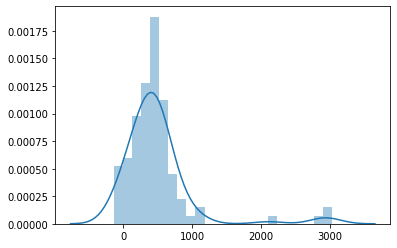

In [92]:
sns.distplot(y_pred)
plt.show()

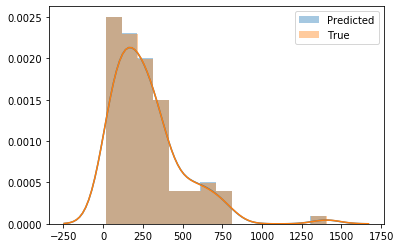

In [93]:
sns.distplot(y_pred1, label="Predicted")
sns.distplot(y2_test, label="True")
plt.legend()
plt.show()

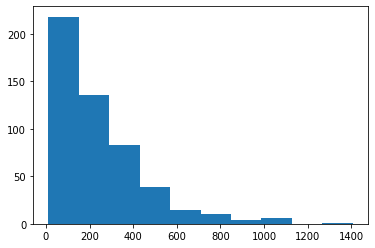

In [94]:
plt.hist(gold.new)
plt.show()

### 3.2

In [78]:
maruti = pd.read_csv("MARUTI.csv")
nifty = pd.read_csv("Nifty50.csv")

In [79]:
maruti.Date = pd.to_datetime(maruti.Date)
maruti = maruti.sort_values('Date', ascending=False)
maruti.set_index('Date', inplace=True)
nifty.Date = pd.to_datetime(nifty.Date)
nifty = nifty.sort_values('Date', ascending=False)
nifty.set_index('Date', inplace=True)

In [80]:
m_daily['pct_change'] = m_daily['Close Price'].pct_change().fillna(0)[:91]
n_daily['pct_change'] = n_daily['Close'].pct_change().fillna(0)[:91]

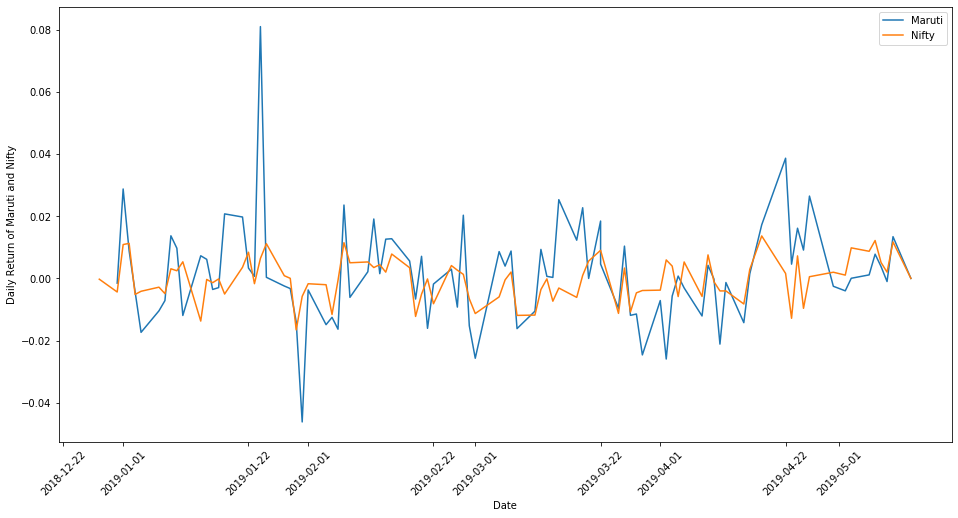

In [81]:
plt.figure(figsize=(16, 8))
plt.plot(m_daily.index, m_daily['pct_change'], label="Maruti")
plt.plot(n_daily.index, n_daily['pct_change'], label="Nifty")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily Return of Maruti and Nifty')
plt.xticks(rotation=45)
plt.show()

In [166]:
import statsmodels.api as sm
from statsmodels import regression
X = n_daily['pct_change'].values
Y = m_daily['pct_change'].values
def linreg(x, y):
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(y,x).fit()
    print(model.summary())
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X, Y)
print("alpha = ", str(alpha))
print('beta = ', str(beta))

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.085
Date:                Wed, 17 Jun 2020   Prob (F-statistic):             0.0824
Time:                        17:37:59   Log-Likelihood:                 248.86
No. Observations:                  91   AIC:                            -493.7
Df Residuals:                      89   BIC:                            -488.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.002      1.014      0.313      -0.002       0.005
x

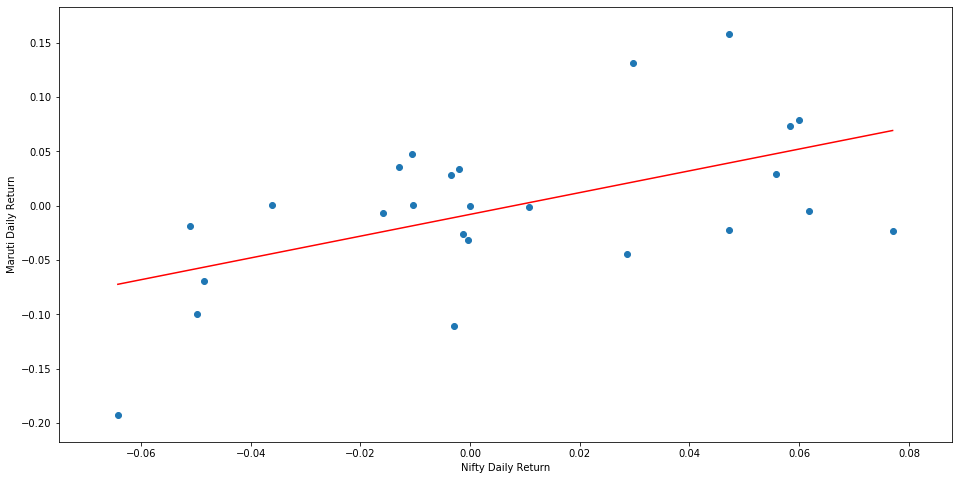

In [170]:
X2 = np.linspace(X.min(), X.max(), 100)
Y2 = X2*beta + alpha
plt.figure(figsize=(16, 8))
plt.scatter(X, Y)
plt.xlabel("Nifty Daily Return")
plt.ylabel("Maruti Daily Return")
plt.plot(X2, Y2, 'r')
plt.show()

In [164]:
maruti['month'] = maruti.index.month
maruti['year'] = maruti.index.year
m_group = maruti.groupby(['year', 'month'])
nifty['month'] = nifty.index.month
nifty['year'] = nifty.index.year
n_group = nifty.groupby(['year', 'month'])

In [167]:
maruti_monthly = pd.DataFrame(list(m_group['Close Price'].first()), columns=['Maruti Close Price'])
nifty_monthly = pd.DataFrame(list(n_group['Close'].first()), columns=['Nifty Close Price'])
monthly_prices = pd.concat([maruti_monthly['Maruti Close Price'], nifty_monthly['Nifty Close Price']], axis=1)
monthly_prices = monthly_prices.pct_change().fillna(0)
X = monthly_prices['Nifty Close Price'].values
Y = monthly_prices['Maruti Close Price'].values
alpha, beta = linreg(X, Y)
print("alpha = ", str(alpha))
print('beta = ', str(beta))

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     9.866
Date:                Wed, 17 Jun 2020   Prob (F-statistic):            0.00458
Time:                        17:38:17   Log-Likelihood:                 34.813
No. Observations:                  25   AIC:                            -65.63
Df Residuals:                      23   BIC:                            -63.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0079      0.013     -0.624      0.539      -0.034       0.018
x

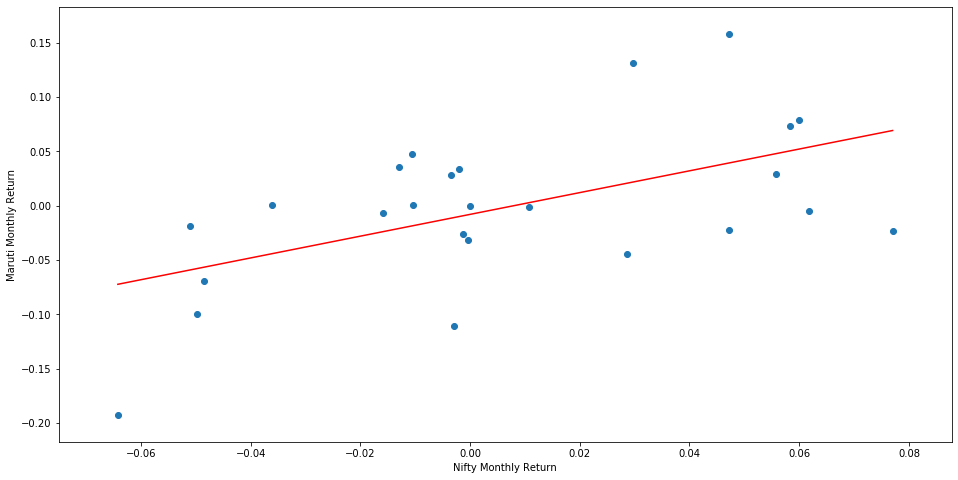

In [169]:
X2 = np.linspace(X.min(), X.max(), 100)
Y2 = X2*beta + alpha
plt.figure(figsize=(16, 8))
plt.scatter(X, Y)
plt.xlabel("Nifty Monthly Return")
plt.ylabel("Maruti Monthly Return")
plt.plot(X2, Y2, 'r')
plt.show()

#### As the beta value of maruti monthly return is greater than 1 and beta value of maruti daily return is less than 1. Therefore we can say that the stock is highly volatile if compared monthly but less volatile daily. Therefore, it may have high return. For negative beta value the stock price of maruti will depreciate with corresponding increase in the nifty stock and vice-versa.
#### The regression plot helps us to see the slope(beta value) is positive or negative and the rate at which it varies with the nifty stock.